# ECE 462 - Homework #1

#### Collin Heist

## Problem 1.1.1

$$p = \frac{h}{\lambda}$$

Momentum is (in SI units) $\frac{kg\cdot m}{s}$ Dimensional analysis yields the following:

$$p=\frac{J\cdot s}{m}$$ where Joules are equivalent to $\frac{kg\cdot m^2}{s^2}$

$$p=\frac{kg\cdot m^2 \cdot s}{s^2\cdot m}=\frac{kg\cdot m}{s}$$

This is the SI unit of momentum.

## Problem 1.1.2

The maximum wavelength possible that still induces photoelectron emission is found right when the energy of the photon is equal to the work function of Titanium. Or:

$$E=h\cdot f$$

$$4.33eV=4.135\cdot 10^{-15}eV\cdot s\cdot f_{max}$$

$$f_{max}=\frac{4.33}{4.135\cdot 10^{-15}}\cdot \frac{1}{s}$$

Where the wavelength is thus:

$$\lambda = \frac{c}{f}$$

$$\lambda _{max} = \frac{3\cdot 10^8 \frac{m}{s}}{1,047,158,403,869,407.4 \frac{1}{s}}$$

Resulting in a maximum wavelength of:

$$\lambda _{max}=2.865\cdot 10^{-7}m$$

$$\lambda _{max}=286.5 nm$$

## Problem 1.1.3

The kinetic energy of an electron through some potential field is:

$$\frac{1}{2}m_ev^2=Q_eV$$

Thus, the velocity of the electron in this field is:

$$v=\sqrt{\frac{2Q_eV}{m_e}}=\sqrt{\frac{2\cdot1.6\cdot 10^{-19}C\cdot 0.02 V}{9.11\cdot 10^{-31}kg}}$$

$$v=83,816.75 \frac{m}{s}$$

The relationship between wavelength and velocity is related by the Planck's constant:

$$\lambda = \frac{h}{m_ev}=\frac{6.62\cdot 10^{-34}J\cdot s}{9.11\cdot 10^{-31}\cdot 83816.75 \frac{kg\cdot m}{s}}$$

The resulting wavelength is thus:

$$\lambda = 8.669\cdot 10^{-9} m\text{ or, } 8.669\text{ }nm$$

## Problem 1.2.1

The wavelength changes as it goes into the barrier because some of the particle's energy has been converted to potential energy (as opposed to kinetic) - thus lowering the speed of the particle. Because of the wave-particle duality, this kinetic energy (in the form of momentum) is related to the wavelength of the particle through $p=\frac{h}{\lambda}$; changing the wavelength.

The imaginary part to the left of its real counterpart indicates that the wave is traveling to the left, as opposed to the right (increasing x) like the part in the potential.

## Problem 1.2.2

The waveform shown in Figure 1.5 exemplifies the Heisenberg uncertainty principle because the particle's waveform is captured at one given time (and therefore momentum) and thus the particle's position is a wave - meaning that the particle only has a _probability_ of existing at any of the given positions. This is a direct application of the uncertainty principle because the particle's known momentum results in uncertainty of its positions.

## Problem 1.2.4

Take the magnitude between 15 and 20 nanometers to be some magnitude $A$, and that it approximately halves in each segment of 5 nanometers that follows. Then the probability of the wave's location is defined as:

$$A+2\cdot (\frac{A}{2})^2+2\cdot (\frac{A}{4})^2=1$$

Solving for A results in the following (note, this does not match the graphical depiction of the magnitude of A because this is the normalized value):

$$A=0.6966$$

### Part a

The probability the particle is between 15 and 20 nanometers is $A^2$.

$$P(15\text{ nm}, 20\text{ nm})=0.6966^2=48.52\%$$

### Part b

$$P(20\text{ nm}, 25\text{ nm})=(\frac{0.6966}{2})^2=12.13\%$$

### Part c

$$P(25\text{ nm}, 30\text{ nm})=(\frac{0.6966}{4})^2=3.03\%$$


## Problem 1.2.5

When the wave has a wavelength of 10 nanometers, it propagates faster than when it is 20 nanometers. This is because the relationship between the particle's velocity and it's wavelength is defined as:

$$v=\frac{h}{m\cdot \lambda}$$

This inverse relationship means that lower wavelength particles travel faster. When changing the wavelength to a negative value, it travels at the same speed (relative to its positive counterpart), but in the opposite direction. This is the result of a "negative" wavelength (as that physical property cannot be negative in the real world) within the code, as the particle travels in the negative-x direction within our program.

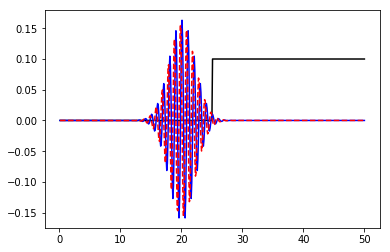

How many time steps--> 1000
FDTD: nstep =  1000


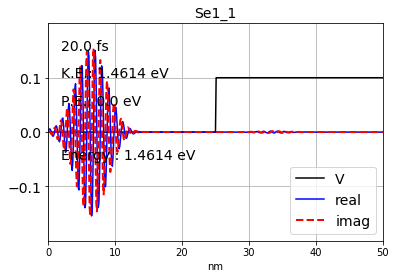

T =  1000    ptot =  1.00049


KeyboardInterrupt: 

In [11]:
""" Se1_1.py """

from math import pi,sqrt, exp, cos, sin
import numpy as np
from matplotlib import pyplot as plt
from numba import jit
""" The above statement is used to import jit.  This
accelerates the computation within a function.  """

NN = 500
hbar = 1.054e-34
m0 = 9.1e-31
meff = 1.0
ecoul = 1.6e-19
epsz = 8.85e-9
eV2J = 1.6e-19
J2eV = 1/eV2J

del_x = 0.1e-9
dt = 2e-17
ra = (0.5*hbar/m0)*(dt/del_x**2)
rd = dt/hbar
DX = del_x*1e9
    
XX = np.linspace(DX,DX*NN,NN)

"""----------- Specify the potential -----------"""

Nmid = int(NN/2)
V = np.zeros(NN)
V[Nmid:] = .1*eV2J
plt.plot(XX,J2eV*V,'k')

""" --------- Initialize psi -------------------"""

lambda_ = -10
sigma   = 30
nc      = 200         # Starting position

prl = np.zeros(NN)
pim = np.zeros(NN)
for n in range(NN):
    prl[n] = np.exp(-1.*((n-nc)/sigma)**2)*np.cos(2*pi*(n-nc)/lambda_)
    pim[n] = np.exp(-1.*(((n-nc)/sigma)**2))*np.sin(2*pi*(n-nc)/lambda_)
    
ptot = np.sum(prl**2 + pim**2)
pnorm = sqrt(ptot)
prl = np.divide(prl,pnorm)
pim = np.divide(pim,pnorm)
    
plt.plot(XX,prl,'b')
plt.plot(XX,pim,'r--')
plt.show()

""" The core FDTD commands are in a function so 
    jit can be used. """
@jit
def fdtd(prl, pim, n_step):
    print("FDTD: nstep = ",n_step)
    for _ in range(n_step):
        
        for n in range(NN-1):
            prl[n] = prl[n] - ra*(pim[n-1] - 2*pim[n] + pim[n+1])+rd*V[n]*pim[n]
            
        for n in range(NN-1): 
            pim[n] = pim[n] + ra*(prl[n-1] - 2*prl[n] + prl[n+1])-rd*V[n]*prl[n]

T = 0

""" --------- The core FDTD loop ---------------"""

while True:
    n_step = int(input("How many time steps--> "))
    if n_step == 0:
        break
    
    T = T + n_step
    fdtd(prl, pim, n_step)
 
#---------Calculate the observables ---------
                          
    ptot = round(np.sum(prl**2 + pim**2),5)
    psi = prl + pim*1j
    PE = round(np.sum( (prl**2 + pim**2)*V)*J2eV,4)
  
    ke = 0.
    for n in range(NN-2):
        ke = ke + (psi[n-1]-2*psi[n]+psi[n+1])*np.conjugate(psi[n])
        
    KE = round(-J2eV*((hbar/del_x)**2/(2*m0))*ke.real,4)
    Etot = round(PE+KE,4)
    time = round(T*dt*1e15,5)
    
# ------------ Plot --------------

    plt.title("Se1_1",fontsize=14)
    plt.axis([ 0, NN*DX , -.2, .2])
    plt.xlabel('nm')
    plt.text(2,0.15,"{} fs".format(time),fontsize=14)           
    plt.text(2,0.1,"K.E.: {} eV".format(KE),fontsize=14)
    plt.text(2,0.05,"P.E.: {} eV".format(PE),fontsize=14)
    plt.text(2,-0.05,"Energy : {} eV".format(Etot),fontsize=14)
    plt.yticks([-.1,0,.1],fontsize=14)
    plt.plot(XX,J2eV*V,'k',label='V')
    plt.plot(XX,prl,'b',label='real')
    plt.plot(XX,pim,'r--',label='imag',linewidth=2)
    plt.legend(loc="lower right",fontsize=14)
    plt.grid()
    plt.savefig('se1_1.png',dpi=300)
    plt.show()
    print("T = ",T,"   ptot = ",ptot)

In [ ]:
# JSAnimation import available at https://github.com/jakevdp/JSAnimation
from JSAnimation import IPython_display
from matplotlib import animation

# create a simple animation
fig = plt.figure()
ax = plt.axes(xlim=(0, 10), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

x = np.linspace(0, 10, 1000)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    line.set_data(x, np.cos(i * 0.02 * np.pi) * np.sin(x - i * 0.02 * np.pi))
    return line,

animation.FuncAnimation(fig, animate, init_func=init,
                        frames=100, interval=20, blit=True)